**Important Instructions**

1. Verify your certificate details before end of session.
2. It's not possible to modify your details after end of today session.We will submit your details after end of session. 


2. Verify your attendance sheet once and if any doubts about attendance ask in the doubts session


3. After end of session we will tell you about exam details


4. Those who are updated their details in certificate details sheet it's your responsibility to check your details updated or not.If updated place YES in sheet provided

#### Dimensionality Reduction

Reducing the dimension of the feature space is called the **dimensionality Reduction**

If we train the model with large number of features/columns it makes difficult for model to understand

There are mainly 2 types to achieve this.
1. Feature elimination
2. Feature Extraction

**Feature Elimination**
    Removing the less important columns and taking only important columns as features is called the feature elimination.

**Feature Extraction**
In feature extraction  we create new independent features where each new independent feature is a combination of old independent features

**simple example for feature extraction**

if we have **number of products** and **price of product** columns as features then we want to transform to single feature

**we can crate total_price = number of products * price product**

**Principal Component Analysis**

PCA is a technique for feature extraction

**We use breast cancer dataset for logistic regression and verify the accuracy**

we apply the PCA for breast cancer to reduce features as 2 columns and apply logistic regression and verify accuracy

#### Without PCA for breast cancer dataset with logistic regression model

In [1]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
import pandas as pd

C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 124, got 112
  return f(*args, **kwds)
C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 124, got 112
  return f(*args, **kwds)


In [5]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
df.shape

(569, 31)

**consider all the columns as features except target**

In [10]:
df.drop('target',axis=1).head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [9]:
X = df.drop('target',axis=1)
y = df['target']
X.shape,y.shape

((569, 30), (569,))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,train_size=0.7,random_state=42
)

In [13]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**score**

In [15]:
print('training score',model.score(X_train,y_train)*100)
print('testing score',model.score(X_test,y_test)*100)

training score 95.22613065326632
testing score 96.49122807017544


#### apply PCA to breast cancer dataset to reduce features as 2 columns

In [16]:
from sklearn.datasets import load_breast_cancer

In [17]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

**Now we need to standardizing the data to apply PCA**

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X = df.drop('target',axis=1)
y = df['target']

**transform the features**

X_transform  = scaler.fit_transform(features)

In [24]:
X_tranform = scaler.fit_transform(X)
X_tranform.shape

(569, 30)

**Now we apply PCA**

In [25]:
from sklearn.decomposition import PCA

C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [26]:
pcaObj = PCA(n_components=2) # number of principal components

newFeatures = pcaObj.fit_transform(features)

In [27]:
newFeatures = pcaObj.fit_transform(X_tranform)

In [28]:
pca_df = pd.DataFrame(newFeatures,columns = ['PCA1','PCA2'])
pca_df.head()

,PCA1,PCA2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
pca_df['target'] = df['target']
pca_df.head()

,PCA1,PCA2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [33]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
print('training score',model.score(X_train,y_train)*100)
print('testing score',model.score(X_test,y_test)*100)

training score 95.22613065326632
testing score 95.90643274853801


**How much information transformed from actual columns to new columns**

In [36]:
pcaObj.explained_variance_ratio_ * 100

array([44.27202561, 18.97118204])

**we may visualize the data**

In [37]:
import matplotlib.pyplot as plt

**we have to seperate cancer and non cancer data**

In [38]:
# non cancer data
mask1 =pca_df['target'] == 0
nonCancer = pca_df[mask1]

nonCancer['target'].value_counts()

0    212
Name: target, dtype: int64

In [39]:
# cancer data

mask2 = pca_df['target'] == 1
cancer = pca_df[mask2]

cancer['target'].value_counts()

1    357
Name: target, dtype: int64

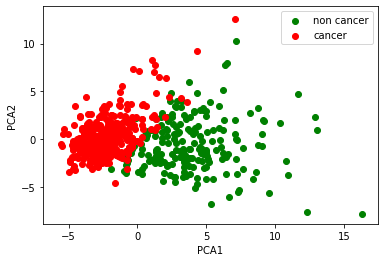

In [41]:
plt.figure()
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.scatter(nonCancer['PCA1'],nonCancer['PCA2'],c='green',label='non cancer')

plt.scatter(cancer['PCA1'],cancer['PCA2'],c='red',label='cancer')

plt.legend()

plt.show()

### How to use these models in realtime

#### How to save and read ml models

**to save model**

In [42]:
import pickle

In [43]:
pickle.dump(model,open('model.pkl','wb'))

**to read the model**

In [44]:
import pickle

In [45]:
model = pickle.load(open('model.pkl','rb'))

**We train the model for fruits dataset and use that model for realtime web application flask**

**connecting ML with website(flask web app)**

**1.get data**

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('fruit_data_with_colours.csv')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [49]:
df.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [50]:
X = df[['mass','width','height']]
y = df['fruit_label']

In [51]:
df.shape

(59, 7)

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

**applying KNN algorithm**

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
print('training score',model.score(X_train,y_train)*100)

training score 68.29268292682927


In [59]:
print('testing score',model.score(X_test,y_test)*100)

testing score 61.111111111111114


In [60]:
import pickle

In [61]:
pickle.dump(model,open('fruits.pkl','wb'))

1. Kaggle website 
2. towardsdatascience
3. Analytics vidya
4. Coursera / Udacity

**Exam will today evening from 6:45PM to 7:15PM**



you get the exam link in your mail before 6:30

**To get the certificate it will take 20-25 days**